In [50]:
# Aula 3 - Visualização de Dados

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [53]:
## Preaparação dos Dados
### Renomeando as colunas do DataFrame
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}
df.rename(columns=novos_nomes, inplace=True)
### Mapeando os valores das colunas categóricas para valores mais descritivos
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)

contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)

tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M': 'media'
}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)

mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}
df['remoto'] = df['remoto'].replace(mapa_trabalho)
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [54]:
# Removendo linhas com valores nulos
df_limpo = df.dropna()

In [55]:
### Convertendo a coluna 'ano' para o tipo inteiro
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

df_limpo.info()

<class 'pandas.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  str   
 2   contrato         133339 non-null  str   
 3   cargo            133339 non-null  str   
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  str   
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  str   
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  str   
 10  tamanho_empresa  133339 non-null  str   
dtypes: int64(3), object(1), str(7)
memory usage: 12.2+ MB


In [56]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


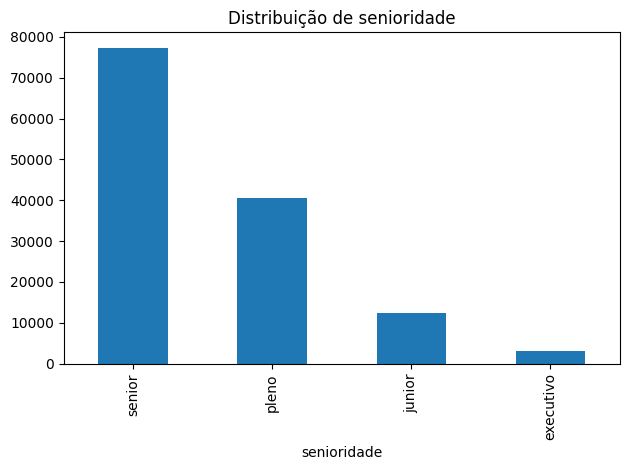

In [57]:
# Análise Exploratória de Dados
df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuição de senioridade")
plt.tight_layout()
plt.show()